In [1]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd

import time
time.sleep(2)

import warnings
warnings.filterwarnings('ignore')

In [2]:
urls = []

url1 = 'https://www.imdb.com/title/tt0312859/reviews/?ref_=tt_ov_rt'
url2 = 'https://www.imdb.com/title/tt0195231/reviews/?ref_=tt_ov_rt'
url3 = 'https://www.imdb.com/title/tt0088763/reviews/?ref_=tt_ov_rt'
url4 = 'https://www.imdb.com/title/tt0047396/reviews/?ref_=tt_ov_rt'
url5 = 'https://www.imdb.com/title/tt1454029/reviews/?ref_=tt_ov_rt'

In [3]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)

In [4]:
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))

In [5]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>9</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw0863721/"> Deeply touching...
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur0152930/">mcnally</a></span><span class="review-date">11 September 2002</span>
</div>
<div class="content">
<div class="text show-more__control">I saw this film at the 2002 Toronto International Film Festival.<br/><br/>This is the first Indian film I've seen in the Tamil language, and while it does share some simil

In [6]:
movie = pd.DataFrame(columns=['Review','Rating'])

In [7]:
review = []
rating = []
count = 0
for cc in content:
    for c in cc:
        count+= 1
        
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'})
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
            
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
            
        val = rVal[0]
        
        if(len(val) > 2):
            continue
        else:
            review.append(rReview)
            rating.append(val)
            
            print('Review: ', rReview)
            print('Rating: ', val)

movie['Review'] = review
movie['Rating'] = rating


Movie review  1
Review:   Deeply touching...

Rating:  9

Movie review  2
Review:   Splendid

Rating:  9

Movie review  3

Movie review  4
Review:   How did they miss this movie?

Rating:  10

Movie review  5
Review:   An entertaining film that also tackles serious issues

Rating:  9

Movie review  6
Review:   The two faces of motherhood.

Rating:  9

Movie review  7
Review:   realistic and touching ... an emotional drainer

Rating:  9

Movie review  8
Review:   If not perfect, what is?

Rating:  10

Movie review  9
Review:   Wow!

Rating:  10

Movie review  10

Movie review  11
Review:   Cinematic gem

Rating:  9

Movie review  12

Movie review  13
Review:   Sumptuous

Rating:  10

Movie review  14
Review:   Most probably the best Tamil movie I've ever seen in my life

Rating:  10

Movie review  15

Movie review  16
Review:   The best in the recent times

Rating:  10

Movie review  17
Review:   Absolute gold

Rating:  10

Movie review  18
Review:   Maybe the greatest Tamil Film I hav

In [8]:
print(movie.head())

                                              Review Rating
0                               Deeply touching...\n      9
1                                         Splendid\n      9
2                    How did they miss this movie?\n     10
3   An entertaining film that also tackles seriou...      9
4                     The two faces of motherhood.\n      9


In [9]:
movie.shape

(101, 2)

In [10]:
movie.to_csv('OlubolaAdegbosin-2304923-Reviews.csv', index=False)

In [11]:
import string
import re
import nltk
nltk.download()

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [12]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(101,)

In [13]:
text = []
for t in textFeatures:
    text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

4070


In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

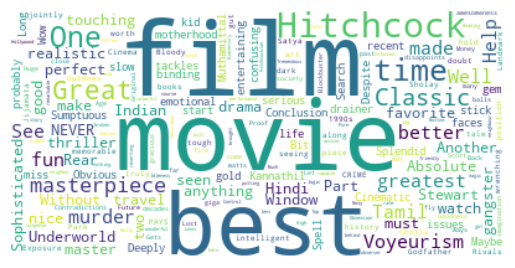

In [15]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save the generated image to a file
wordcloud.to_file("wordcloud_cb_all.png")

In [16]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Olubola
[nltk_data]     Adegbosin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
    
    if(ss['compound'] >= 0.05):
        print('positive')
        
    elif(ss['compound'] <= -0.05):
        print('negative')
        
    else:
        print('neutral')
        
    print('\n')

1  Deeply touching...

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


2  Splendid

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
positive


3  How did they miss this movie?

{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.1531}
negative


4  An entertaining film that also tackles serious issues

{'neg': 0.127, 'neu': 0.588, 'pos': 0.284, 'compound': 0.3818}
positive


5  The two faces of motherhood.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


6  realistic and touching ... an emotional drainer

{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.1531}
positive


7  If not perfect, what is?

{'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}
negative


8  Wow!

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6239}
positive


9  Cinematic gem

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


10  Sumptuous

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


11  Most probably the best Tamil

In [18]:
label = []
for r in movie['Rating']:
    r = int(r)
    
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural

movie['class-label'] = label

In [19]:
movie['class-label'].value_counts()

1     97
-1     3
0      1
Name: class-label, dtype: int64

In [20]:
movie = movie[movie['class-label']!='0']

In [21]:
movie['class-label'].value_counts()

1     97
-1     3
Name: class-label, dtype: int64

In [22]:
print(movie)

                                                Review Rating class-label
0                                 Deeply touching...\n      9           1
1                                           Splendid\n      9           1
2                      How did they miss this movie?\n     10           1
3     An entertaining film that also tackles seriou...      9           1
4                       The two faces of motherhood.\n      9           1
..                                                 ...    ...         ...
95    Anachronistic, melodramatic take on discrimin...      3          -1
97    A Movie That Helps To Expose The Racial Divid...      9           1
98                                      Great Movie!\n      7           1
99    Cartoon caricatures trivialize in black and w...      2          -1
100   Exploits real suffering, and panders for symp...      3          -1

[100 rows x 3 columns]


In [23]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(100,)

In [24]:
import nltk
nltk.download('punkt')

# Stemming using TextBlob library for stemming
from textblob import TextBlob

[nltk_data] Downloading package punkt to C:\Users\Olubola
[nltk_data]     Adegbosin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [26]:
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


In [27]:
output= textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s')

len(output)

9

In [28]:
#countvectorizer converts each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english',
tokenizer=textblob_tokenizer)

#convers text into a vector based on tf-idf weighting scheme.
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english',
tokenizer=textblob_tokenizer)

In [29]:
count_matrix = countvectorizer.fit_transform(textFeatures)
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [30]:
print(tfidf_matrix.shape)
print(count_matrix.shape)

(100, 254)
(100, 254)


In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(tfidf_matrix, movie['class-label'], test_size=0.3, random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(70, 254) (30, 254) (70,) (30,)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ',acc)

from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:',prec)

from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ',recall)

from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))


Evaluation for SVM 

Accuracy:  0.9333333333333333
Precision: 0.8711111111111111
Recall:  0.9333333333333333
F-1 measure:  0.9011494252873563

Confusion Matrix:

[[ 0  2]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           1       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



In [34]:
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ',acc)

prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ',prec)

recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ',recall)

f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.9333333333333333
Precision:  0.8711111111111111
Recall:  0.9333333333333333
F-1 measure:  0.9011494252873563

Confusion Matrix:

[[ 0  2]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           1       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

